In [120]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [121]:
df = pd.read_csv("heart.csv")

| | |
|-|-|
|age|               in years|
|sex |              (1 = male; 0 = female)|
|cp |               chest pain type|
|trestbps| resting blood pressure (in mm Hg on admission to the hospital)|
|chol| serum cholestoral in mg/dl|
|fbs |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|restecg |resting electrocardiographic results|
|thalach| maximum heart rate achieved|
|exang |exercise induced angina (1 = yes; 0 = no)|
|oldpeak| ST depression induced by exercise relative to rest|
|slope| the slope of the peak exercise ST segment|
|ca| number of major vessels (0-3) colored by flourosopy|
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target| 1 or 0 |

In [122]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [123]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [124]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [125]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [126]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [127]:
df = df.drop(df[df.thal == 0].index)

In [128]:
df['ca'].value_counts()

0    173
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [129]:
df = df.drop(df[df.ca == 4].index)

In [130]:
df['restecg'].value_counts()

1    147
0    145
2      4
Name: restecg, dtype: int64

In [131]:
df = df.drop(df[df.restecg == 2].index)

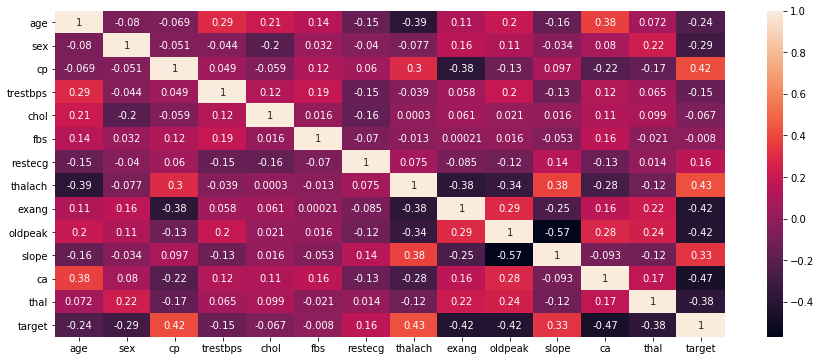

In [136]:
corrMatrix = df.corr()
plt.subplots(figsize=(15,6))
sns.heatmap(corrMatrix, annot=True)
# plt.figure(figsize=(30,10))
# fig, ax = plt.subplots(figsize=(40,20))
plt.show()

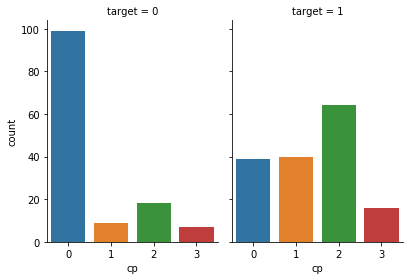

In [137]:
g = sns.catplot(x="cp", col="target",data=df, kind="count",height=4, aspect=.7);

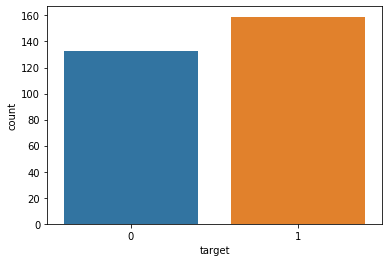

In [138]:
sns.countplot(x='target', data=df)

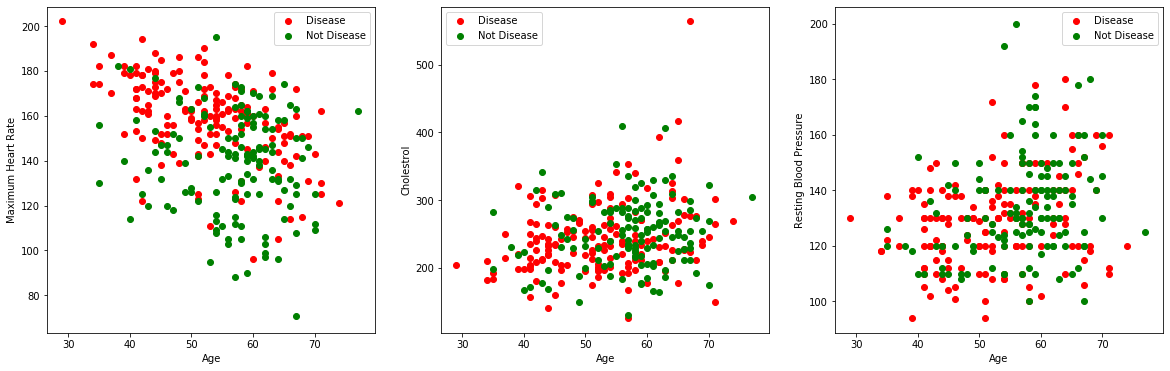

In [139]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(x = df.age[df.target==1], y = df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

plt.subplot(1,3,2)
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Cholestrol")

plt.subplot(1,3,3)
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")

plt.show()

In [140]:
dummy = pd.get_dummies(df['cp'], prefix='cp')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [141]:
dummy = pd.get_dummies(df['sex'], prefix='sex')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [142]:
dummy = pd.get_dummies(df['exang'], prefix='exang')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [143]:
dummy = pd.get_dummies(df['restecg'], prefix='restecg')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [144]:
df = df.drop(columns=['sex', 'cp', 'exang', 'restecg'])

In [145]:
df.head()

,age,trestbps,chol,fbs,thalach,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,exang_0,exang_1,restecg_0,restecg_1
0,63,145,233,1,150,2.3,0,0,1,1,0,0,0,1,0,1,1,0,1,0
1,37,130,250,0,187,3.5,0,0,2,1,0,0,1,0,0,1,1,0,0,1
2,41,130,204,0,172,1.4,2,0,2,1,0,1,0,0,1,0,1,0,1,0
3,56,120,236,0,178,0.8,2,0,2,1,0,1,0,0,0,1,1,0,0,1
4,57,120,354,0,163,0.6,2,0,2,1,1,0,0,0,1,0,0,1,0,1


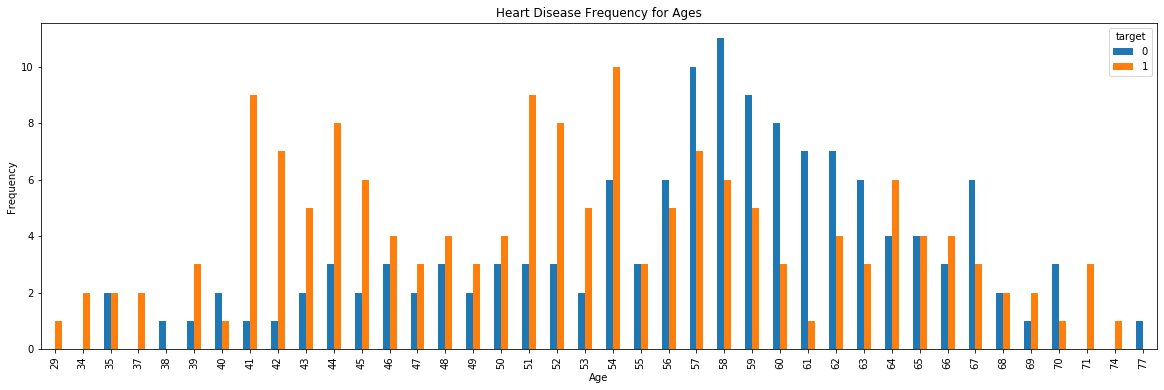

In [146]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### By looking at the plot we can make bins for ages

In [147]:
# age_bins = pd.cut(x=df['age'], bins=[20, 40, 50, 60])
# df['age_bins'] = pd.cut(x=df['age'], bins=[0, 40, 50, 60, 70, 80], labels=[1,2,3, 4, 5])
# df['age_bins'].isna().sum()

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [150]:
Y = df['target']
X = df.drop(columns='target')

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [220]:
# clf = LogisticRegression(random_state=0)
# clf = RandomForestClassifier()
# clf = GaussianNB()
# clf = GradientBoostingClassifier()
clf = KNeighborsClassifier(n_neighbors=14)

In [221]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [222]:
predictions = clf.predict(X_test)

In [223]:
accuracy_score(y_test, predictions)

0.6949152542372882